In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/DFS/pu/thesis/the_new_one/survival
!ls

/content/drive/.shortcut-targets-by-id/167-iUoMM_eTNw7-YcdgOkSYc2VhF0pl4/thesis/the_new_one/survival
code  data  models  results


In [3]:
data_path = "./data"
results_path = "./results"

In [4]:
# !pip install "numpy<2.0"
# !pip install git+https://github.com/it-dainb/pysurvival.git

In [5]:
!cat $results_path/log_less_4.txt

'================================== ConditionalSurvivalForestModel =================================='
./models_less_4/ ConditionalSurvivalForestModel /2
|            |        2 |
|:-----------|---------:|
| FOLD_IDX   | 2        |
| CI         | 0.736277 |
| IBS        | 0.116244 |
| SORT_VALUE | 0.810017 |
|   FOLD_IDX |       CI |      IBS |   SORT_VALUE |
|-----------:|---------:|---------:|-------------:|
|          2 | 0.736277 | 0.116244 |     0.810017 |
|          4 | 0.740291 | 0.132365 |     0.803963 |
|          1 | 0.68624  | 0.123316 |     0.781462 |
|         16 | 0.656087 | 0.105586 |     0.775251 |
|         11 | 0.678771 | 0.13346  |     0.772656 |
|         12 | 0.660568 | 0.117053 |     0.771757 |
|         15 | 0.653659 | 0.116309 |     0.768675 |
|          7 | 0.660007 | 0.123295 |     0.768356 |
|         10 | 0.667382 | 0.133699 |     0.766842 |
|          6 | 0.669436 | 0.137116 |     0.76616  |
|          9 | 0.652726 | 0.12382  |     0.764453 |
|          5 |

In [6]:
from pysurvival.models.semi_parametric import NonLinearCoxPHModel
from pysurvival.models.multi_task import NeuralMultiTaskModel
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel

import matplotlib.pyplot as plt
import seaborn as sns
import os, json

csf_path = os.path.join(results_path, "ConditionalSurvivalForestModel", "2")
csf_config = json.load(open(os.path.join(csf_path, "config.json"), 'r'))
csf_model = ConditionalSurvivalForestModel(**csf_config)
csf_model.load(os.path.join(csf_path, "model.zip"))

nmt_path = os.path.join(results_path, "NeuralMultiTaskModel", "3")
nmt_config = json.load(open(os.path.join(nmt_path, "config.json"), 'r'))
nmt_model = NeuralMultiTaskModel(**nmt_config)
nmt_model.load(os.path.join(nmt_path, "model.zip"))

cox_path = os.path.join(results_path, "NonLinearCoxPHModel", "10")
cox_config = json.load(open(os.path.join(cox_path, "config.json"), 'r'))
cox_model = NonLinearCoxPHModel(**cox_config)
cox_model.load(os.path.join(results_path, "NonLinearCoxPHModel", "10", "model.zip"))

Loading the model from ./results/ConditionalSurvivalForestModel/2/model.zip
Loading the model from ./results/NeuralMultiTaskModel/3/model.zip


/usr/local/lib/python3.11/dist-packages/pysurvival/models/__init__.py:153: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load( temp_folder + 'model' )


Loading the model from ./results/NonLinearCoxPHModel/10/model.zip


In [7]:
import pandas as pd
import os
import joblib

csf_test = joblib.load(os.path.join(csf_path, "test.joblib"))
nmt_test = joblib.load(os.path.join(nmt_path, "test.joblib"))
cox_test = joblib.load(os.path.join(cox_path, "test.joblib"))

csf_test[0]['cens'] = csf_test[1]['cens'].astype(int)
csf_test[0]['time'] = csf_test[1]['time'].astype(int)

nmt_test[0]['cens'] = nmt_test[1]['cens'].astype(int)
nmt_test[0]['time'] = nmt_test[1]['time'].astype(int)

cox_test[0]['cens'] = cox_test[1]['cens'].astype(int)
cox_test[0]['time'] = cox_test[1]['time'].astype(int)

df_test = pd.concat([csf_test[0], nmt_test[0], cox_test[0]])
df_test.drop_duplicates(inplace=True)

csf_train = joblib.load(os.path.join(csf_path, "train.joblib"))
nmt_train = joblib.load(os.path.join(nmt_path, "train.joblib"))
cox_train = joblib.load(os.path.join(cox_path, "train.joblib"))

df_train = pd.concat([csf_train[0], nmt_train[0], cox_train[0]])
df_train.drop_duplicates(inplace=True)

remove_ids = []
for idx in df_train.index:
    if idx in df_test.index:
        remove_ids.append(idx)

df_test.drop(remove_ids, inplace=True)

df_test

,price,competitors,review_length,customer_engagement,rating,num_reviews,avg_a_food,avg_a_service,avg_a_atmosphere,cens,time
35,1.0,61.367816,122.916000,4.770115,3.5,2.873563,3.461538,3.538462,3.641026,1,2618
172,1.0,47.307692,162.045340,154.230769,4.9,30.538462,4.565517,4.606897,4.655172,1,366
19,0.0,53.946667,68.280899,6.413333,4.6,2.373333,4.848485,4.848485,4.878788,0,2253
195,1.0,46.933333,165.211310,147.133333,4.9,22.400000,4.809211,4.888158,4.822368,0,427
161,1.0,88.454545,86.270492,249.909091,4.9,33.272727,4.866310,4.935829,4.898396,0,306
197,1.0,26.907216,174.924444,9.597938,3.9,2.319588,4.291667,4.375000,4.263889,1,2922
46,1.0,70.952381,137.267176,6.666667,3.7,2.079365,4.060606,4.303030,4.363636,1,1888
86,1.0,57.391753,90.438486,7.814433,3.8,3.268041,4.250000,4.166667,4.216667,1,2922
234,0.0,73.120000,163.102564,11.600000,4.0,3.120000,4.363636,4.454545,4.363636,1,731
125,1.0,87.263158,233.472036,145.105263,4.9,23.526316,4.757895,4.905263,4.847368,1,550


In [8]:
features = list(df_test.columns)
features.remove('cens')
features.remove('time')

X_test = df_test[features]
T_test = df_test['time'].values
E_test = df_test['cens'].values

features

['price',
 'competitors',
 'review_length',
 'customer_engagement',
 'rating',
 'num_reviews',
 'avg_a_food',
 'avg_a_service',
 'avg_a_atmosphere']

In [9]:
X_test

,price,competitors,review_length,customer_engagement,rating,num_reviews,avg_a_food,avg_a_service,avg_a_atmosphere
35,1.0,61.367816,122.916000,4.770115,3.5,2.873563,3.461538,3.538462,3.641026
172,1.0,47.307692,162.045340,154.230769,4.9,30.538462,4.565517,4.606897,4.655172
19,0.0,53.946667,68.280899,6.413333,4.6,2.373333,4.848485,4.848485,4.878788
195,1.0,46.933333,165.211310,147.133333,4.9,22.400000,4.809211,4.888158,4.822368
161,1.0,88.454545,86.270492,249.909091,4.9,33.272727,4.866310,4.935829,4.898396
197,1.0,26.907216,174.924444,9.597938,3.9,2.319588,4.291667,4.375000,4.263889
46,1.0,70.952381,137.267176,6.666667,3.7,2.079365,4.060606,4.303030,4.363636
86,1.0,57.391753,90.438486,7.814433,3.8,3.268041,4.250000,4.166667,4.216667
234,0.0,73.120000,163.102564,11.600000,4.0,3.120000,4.363636,4.454545,4.363636
125,1.0,87.263158,233.472036,145.105263,4.9,23.526316,4.757895,4.905263,4.847368


In [10]:
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score, compare_to_actual

def evaluate(model, X, T, E, model_name="", plot=True):
    errors = compare_to_actual(model, X, T, E, is_at_risk=False, plot=plot)
    c_index = concordance_index(model, X, T, E)
    ibs = integrated_brier_score(model, X, T, E, plot=plot)

    metrics = {
        'C-index': c_index,
        'IBS': ibs,
        'RMSE': errors['root_mean_squared_error'],
        'MADE': errors['median_absolute_error'],
        'MAE': errors['mean_absolute_error']
    }

    eval_df = pd.DataFrame(data=metrics, index=[model_name])

    return eval_df, metrics

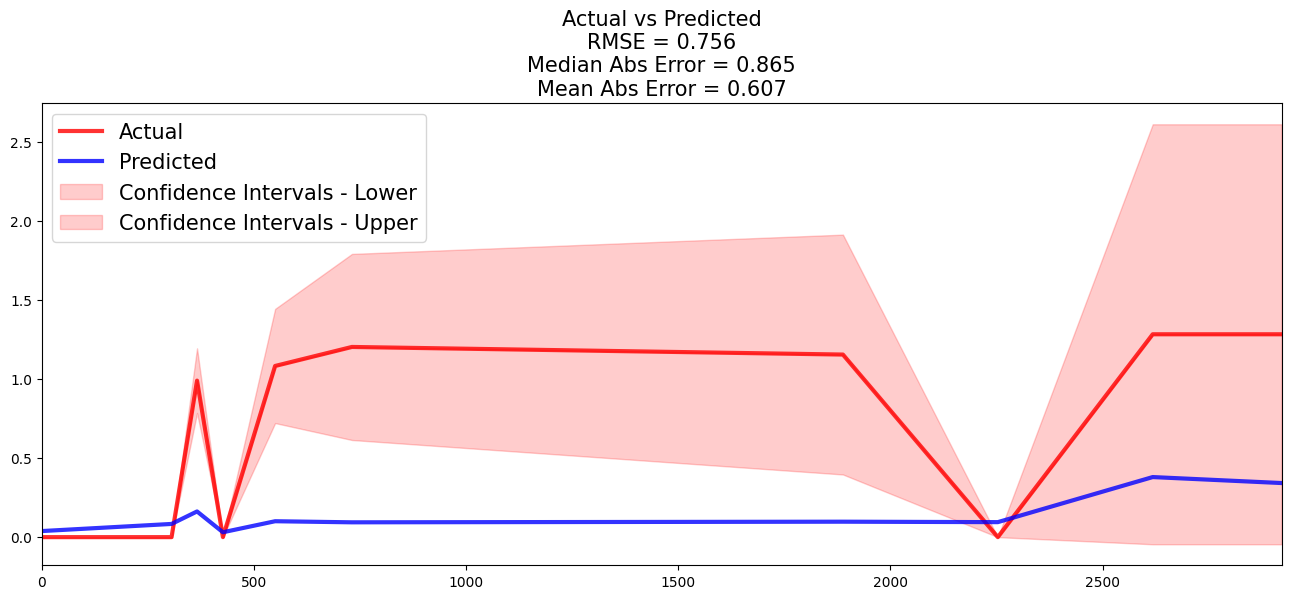

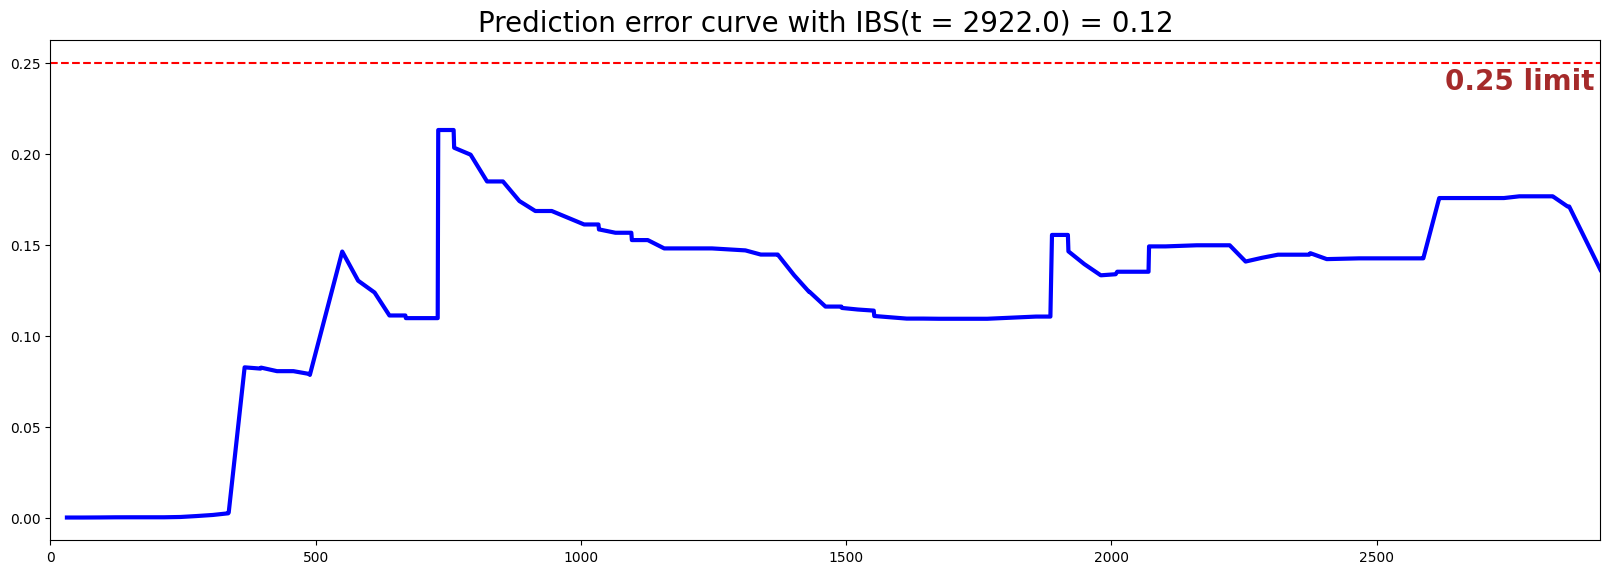

,C-index,IBS,RMSE,MADE,MAE
,0.847246,0.123565,0.756192,0.865412,0.606853


In [11]:
eval_df, metrics = evaluate(csf_model, X_test, T_test, E_test)
eval_df

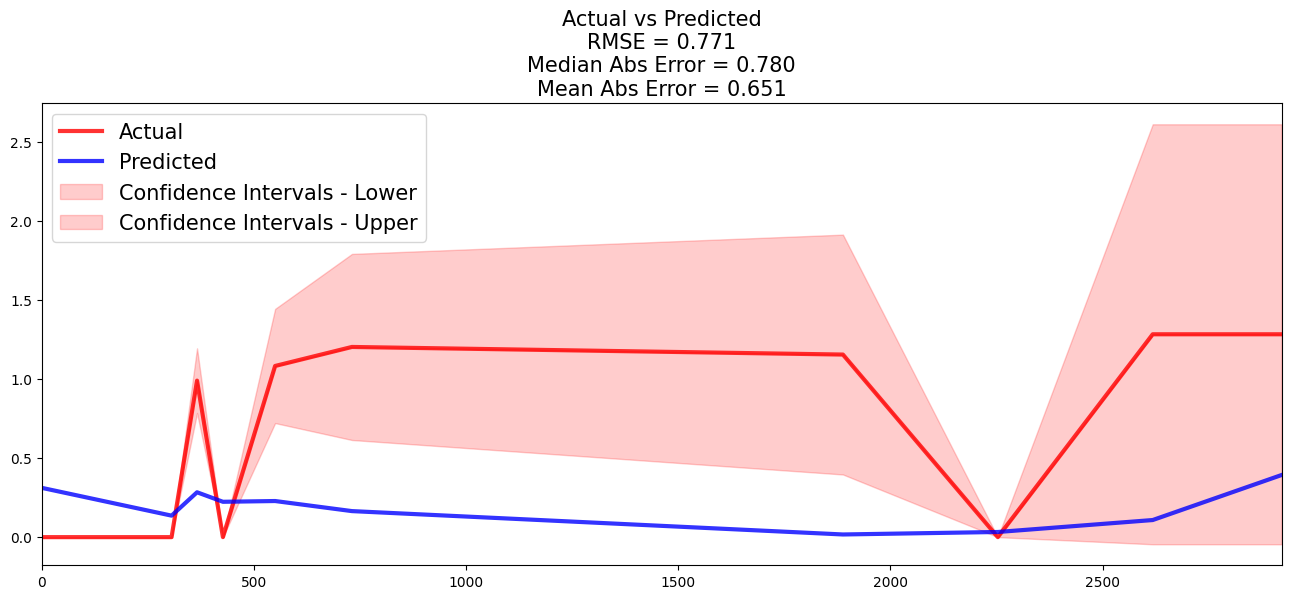

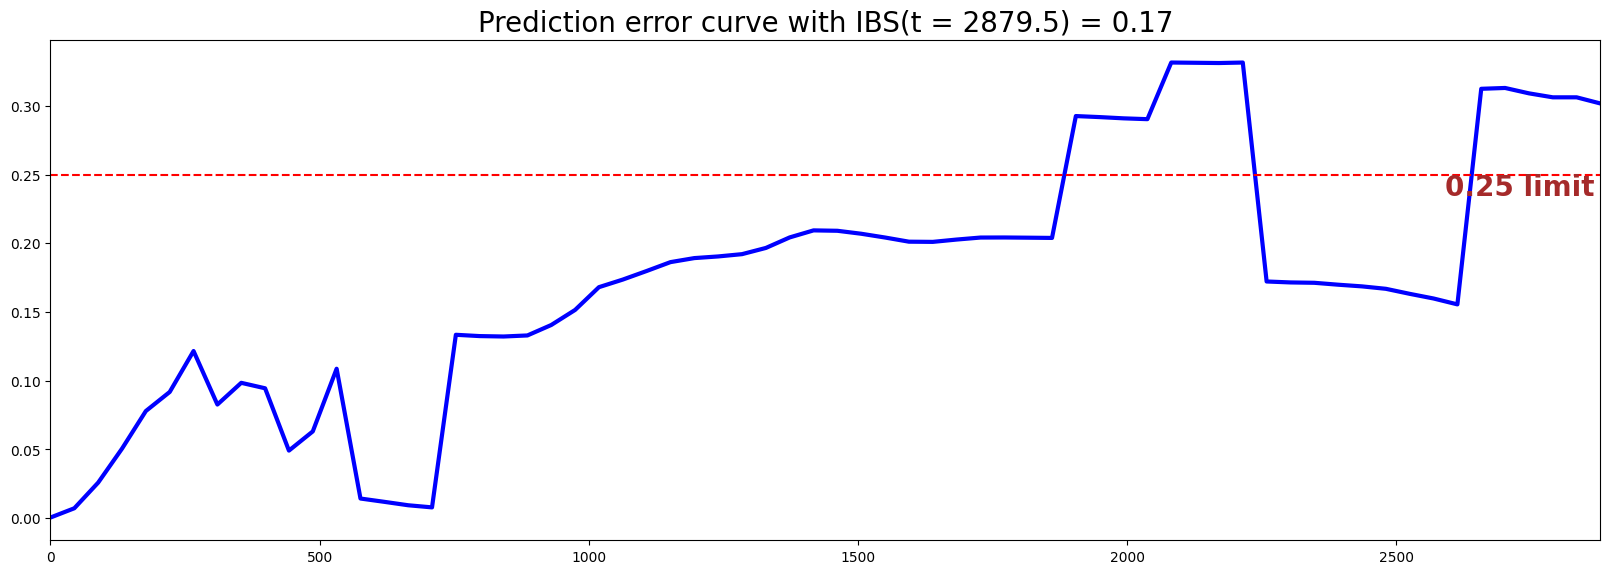

,C-index,IBS,RMSE,MADE,MAE
,0.549735,0.174792,0.77087,0.78028,0.650641


In [12]:
eval_df, metrics = evaluate(nmt_model, X_test, T_test, E_test)
eval_df

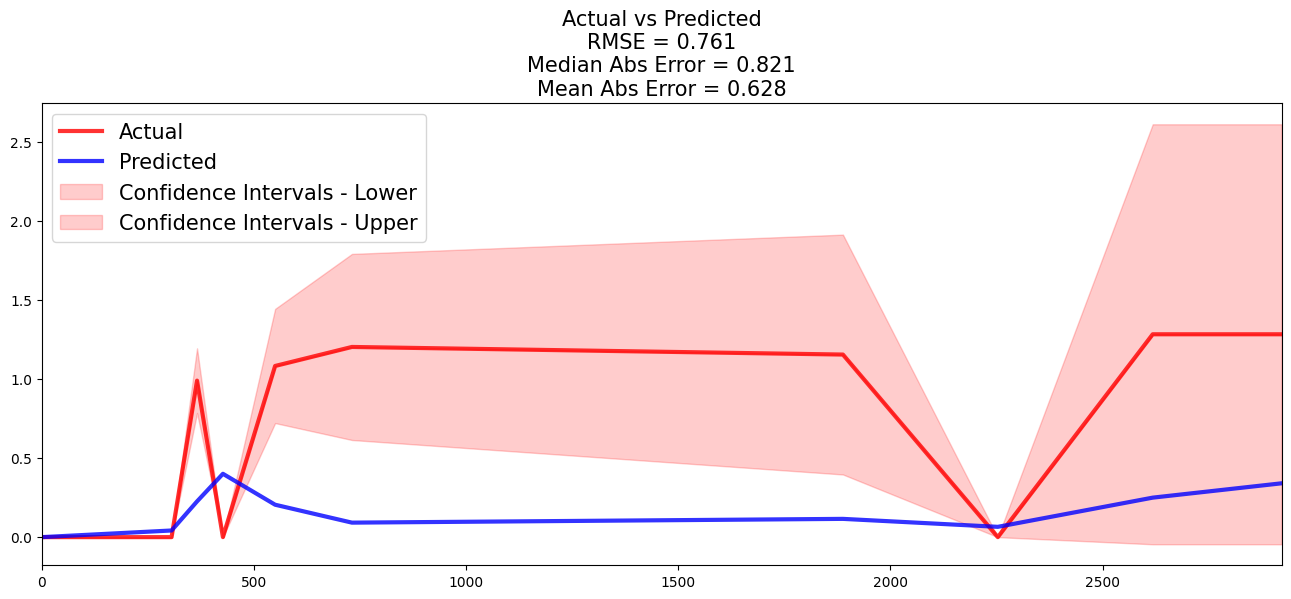

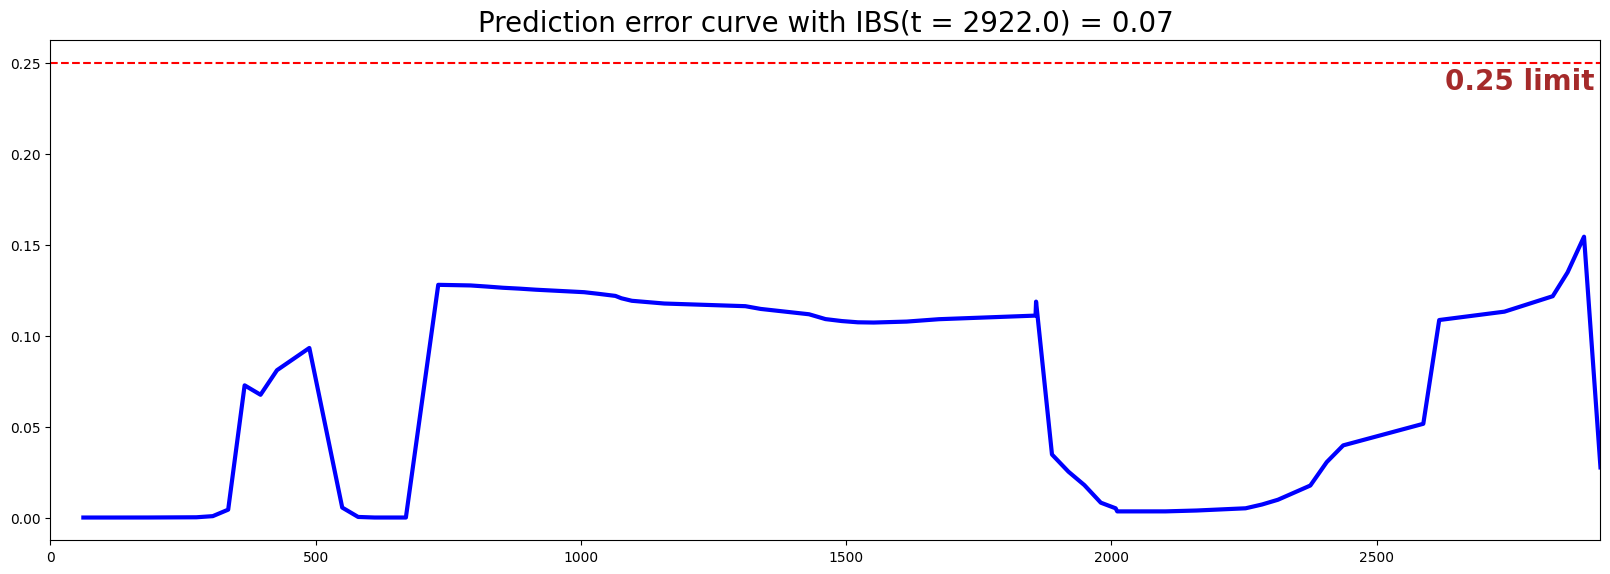

,C-index,IBS,RMSE,MADE,MAE
,0.933474,0.069141,0.761126,0.82086,0.627669


In [13]:
eval_df, metrics = evaluate(cox_model, X_test, T_test, E_test)
eval_df

In [14]:
!ls $data_path

comment.zip		       df_final.gsheet	   df_numeric_aug.csv	      df_numeric.csv
df_aspect_analysis_expand.csv  df_final_kmean.csv  df_numeric_augment.csv     pu.csv
df_final.csv		       df_imb.csv	   df_numeric_augment.gsheet


In [15]:
df = pd.read_csv(os.path.join(data_path, "df_numeric_aug.csv"), index_col=False)

X_full = df[features]
T_full = df['survival_duration_days'].values
E_full = df['closed'].values

In [16]:
df['risk_score'] = cox_model.predict_risk(X_full)

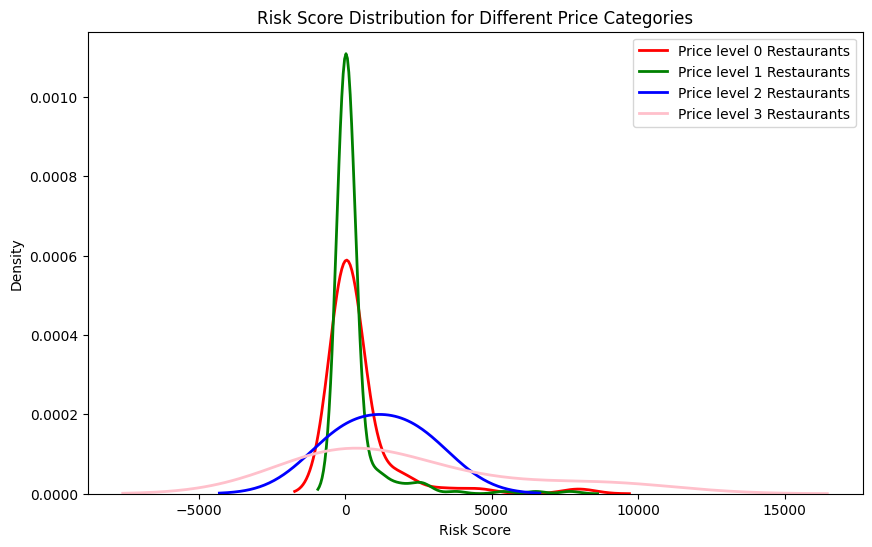

In [17]:
# visualize risk score distribution between 4 prices and all restaurant

# Filter out extreme outliers for better visualization (keeping risk scores below 100) because the higher risk score is near to 0 value
df_filtered = df[df["risk_score"] < 10000]
# df_filtered = df

plt.figure(figsize=(10, 6))

# Plot KDE for high-price and low-price restaurants
sns.kdeplot(df_filtered[df_filtered["price"] == 0]["risk_score"], label="Price level 0 Restaurants", color="red", linewidth=2)
sns.kdeplot(df_filtered[df_filtered["price"] == 1]["risk_score"], label="Price level 1 Restaurants", color="green", linewidth=2)
sns.kdeplot(df_filtered[df_filtered["price"] == 2]["risk_score"], label="Price level 2 Restaurants", color="blue", linewidth=2)
sns.kdeplot(df_filtered[df_filtered["price"] == 3]["risk_score"], label="Price level 3 Restaurants", color="pink", linewidth=2)

# Labels and title
plt.xlabel("Risk Score")
plt.ylabel("Density")
plt.title("Risk Score Distribution for Different Price Categories")
plt.legend()

# Show the plot
plt.show()

In [18]:
# import shap
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# # Explainer for DeepSurv
# explainer = shap.Explainer(cox_model.predict_risk, X_full)
# shap_values = explainer(X_full)

In [19]:
# shap_values.feature_names

In [20]:
# shap.summary_plot(shap_values.values, shap_values.data, feature_names=shap_values.feature_names)

In [21]:
# shap_values.values

In [22]:
# import numpy as np

# def remove_outliers(shap_values, threshold=1.5):
#     # Convert the shap_values to a DataFrame
#     shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)

#     # For each column, compute the IQR and filter out outliers
#     for col in shap_df.columns:
#         Q1 = shap_df[col].quantile(0.25)
#         Q3 = shap_df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - threshold * IQR
#         upper_bound = Q3 + threshold * IQR

#         shap_df[col] = shap_df[col].apply(
#             lambda x: x if (x >= lower_bound and x <= upper_bound) else np.nan
#         )

#     # Drop any row that has NaN in any column
#     shap_df.dropna(axis=0, inplace=True)

#     # Return the filtered SHAP values as a numpy array
#     return shap_df.to_numpy()

# filtered_value = remove_outliers(shap_values, 1.5)
# filtered_data = shap_values.data[:len(filtered_value)]

# shap.summary_plot(filtered_value, filtered_data, feature_names=shap_values.feature_names)

In [23]:
# features_imp = np.abs(filtered_value).mean(axis=0)
# pd.DataFrame({
#     'Feature': shap_values.feature_names,
#     'Importance': features_imp
# }).sort_values(by='Importance', ascending=False)

In [24]:
# shap.plots.bar(shap_values)

In [25]:
# # shap.initjs()
# shap.plots.waterfall(shap_values[0], max_display=12)

In [26]:
from sklearn.cluster import KMeans
risk_profile = X_full.copy()
risk_profile['risk_score'] =  cox_model.predict_risk(risk_profile, use_log=True)
risk_profile.head()

kmeans = KMeans(n_clusters=3, random_state=42).fit(risk_profile[['risk_score']])
risk_profile['risk_group'] = kmeans.labels_

risk_group_bound = risk_profile.groupby('risk_group')['risk_score'].min().sort_values().to_frame()
risk_group_bound.index = ['low', 'medium', 'high']
risk_group_bound.columns = ['lower_bound']
risk_group_bound['upper_bound'] = risk_group_bound['lower_bound'].shift(periods=-1).fillna(risk_profile['risk_score'].max())
risk_group_bound['color'] = ['red', 'green', 'blue']
risk_group_bound

,lower_bound,upper_bound,color
low,-6.393477,-0.028751,red
medium,-0.028751,6.702875,green
high,6.702875,28.328461,blue


In [27]:
risk_group_bound

,lower_bound,upper_bound,color
low,-6.393477,-0.028751,red
medium,-0.028751,6.702875,green
high,6.702875,28.328461,blue


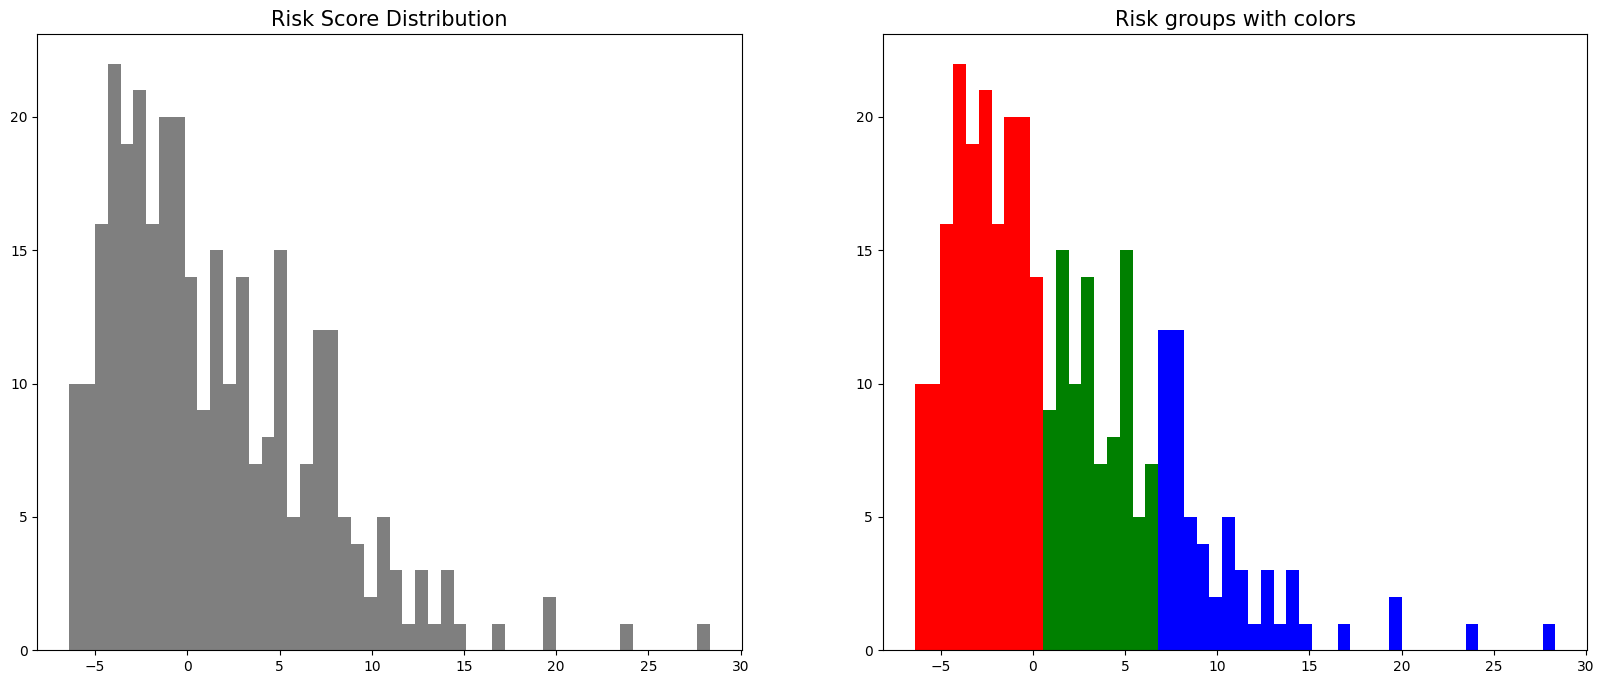

In [28]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(
    model=cox_model, X=X_full, num_bins=50,
    **risk_group_bound.T.to_dict())

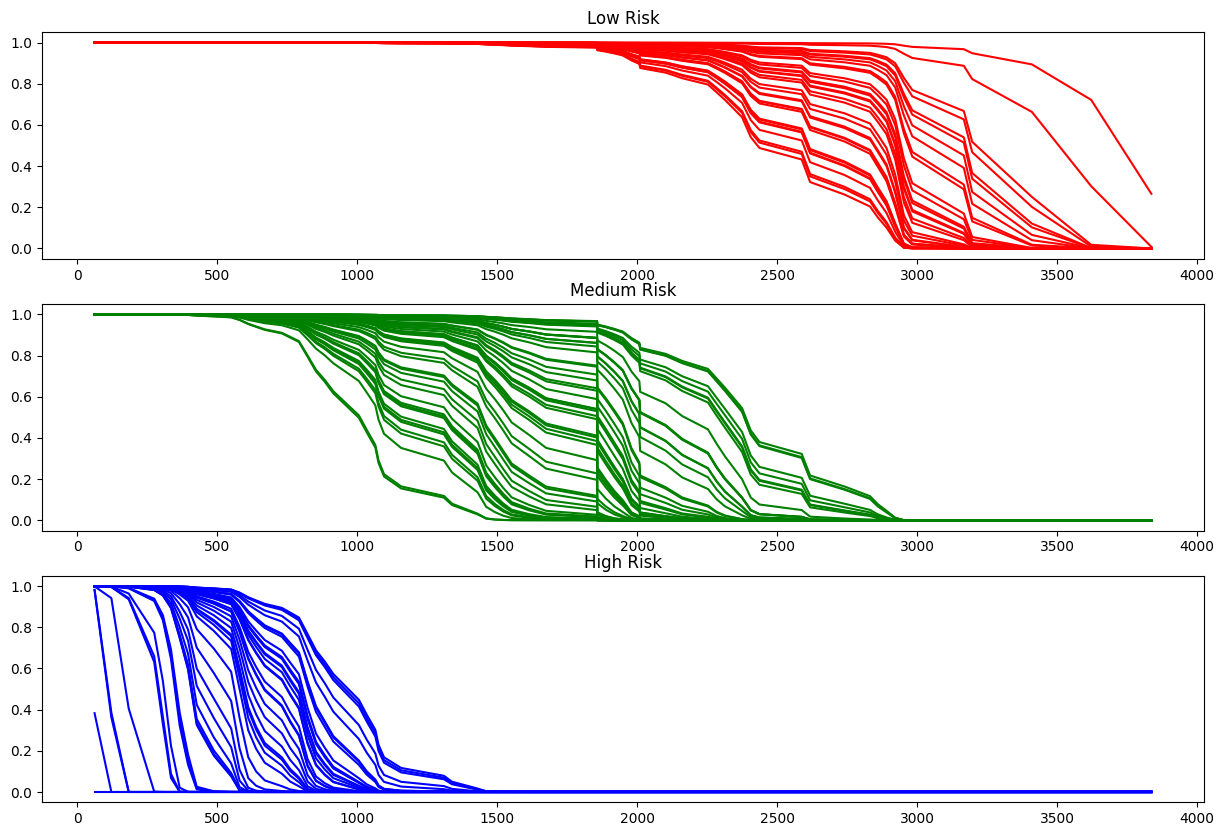

In [29]:
import numpy as np
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

for i, (ax, (label, (color, idxs))) in enumerate(zip(axes.flat, risk_groups.items())):
    X = X_full.values[idxs, :]
    T = T_full[idxs]
    E = E_full[idxs]

    broken = np.argwhere((E == 1)).flatten()
    for j in broken:
        survival = cox_model.predict_survival(X[j, :]).flatten()
        ax.plot(cox_model.times, survival, color=color)

    ax.set_title(f"{label.title()} Risk")

plt.show()

In [36]:
from sklearn.cluster import KMeans
risk_profile = X_full.copy()
risk_profile['risk_score'] =  cox_model.predict_risk(risk_profile, use_log=True)
risk_profile.head()

risk_group_bound = risk_profile.groupby('price')['risk_score'].min().sort_values().to_frame()
risk_group_bound.index = [str(i) for i in risk_group_bound.index]
risk_group_bound.columns = ['lower_bound']
# risk_group_bound['upper_bound'] = risk_group_bound['lower_bound'].shift(periods=-1).fillna(risk_profile['risk_score'].max())

iqr = risk_profile['risk_score'].quantile(0.75) - risk_profile['risk_score'].quantile(0.25)
min_width = 0.5 * iqr  # 10% of IQR

print("MIN WIDTH", min_width)

risk_group_bound['upper_bound'] = risk_group_bound['lower_bound'].shift(-1)

# Ensure minimum bin width
for i in range(len(risk_group_bound) - 1):
    if (risk_group_bound.iloc[i+1, 0] - risk_group_bound.iloc[i, 0]) < min_width:
        risk_group_bound.iloc[i+1, 0] = risk_group_bound.iloc[i, 0] + min_width

# Recalculate upper_bound
risk_group_bound['upper_bound'] = risk_group_bound['lower_bound'].shift(-1).fillna(risk_profile['risk_score'].max())


risk_group_bound['color'] = ['red', 'green', 'blue', 'purple']
risk_group_bound

MIN WIDTH 3.862451434135437


<ipython-input-36-c94682f9068d>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.531026005744934' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  risk_group_bound.iloc[i+1, 0] = risk_group_bound.iloc[i, 0] + min_width


,lower_bound,upper_bound,color
1.0,-6.393477,-2.531026,red
0.0,-2.531026,1.331425,green
3.0,1.331425,5.193877,blue
2.0,5.193877,28.328461,purple


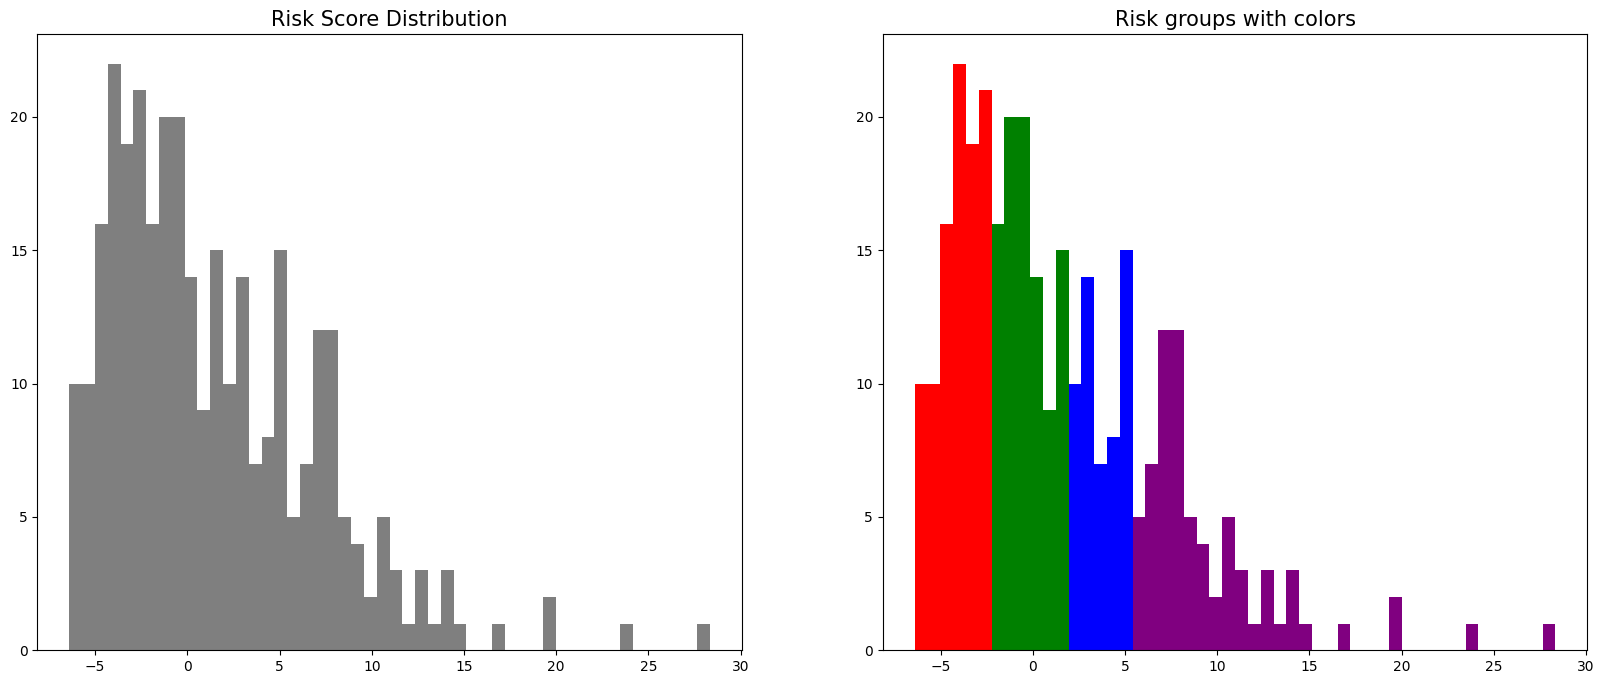

In [37]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(
    model=cox_model, X=X_full, num_bins=50,
    **risk_group_bound.T.to_dict())

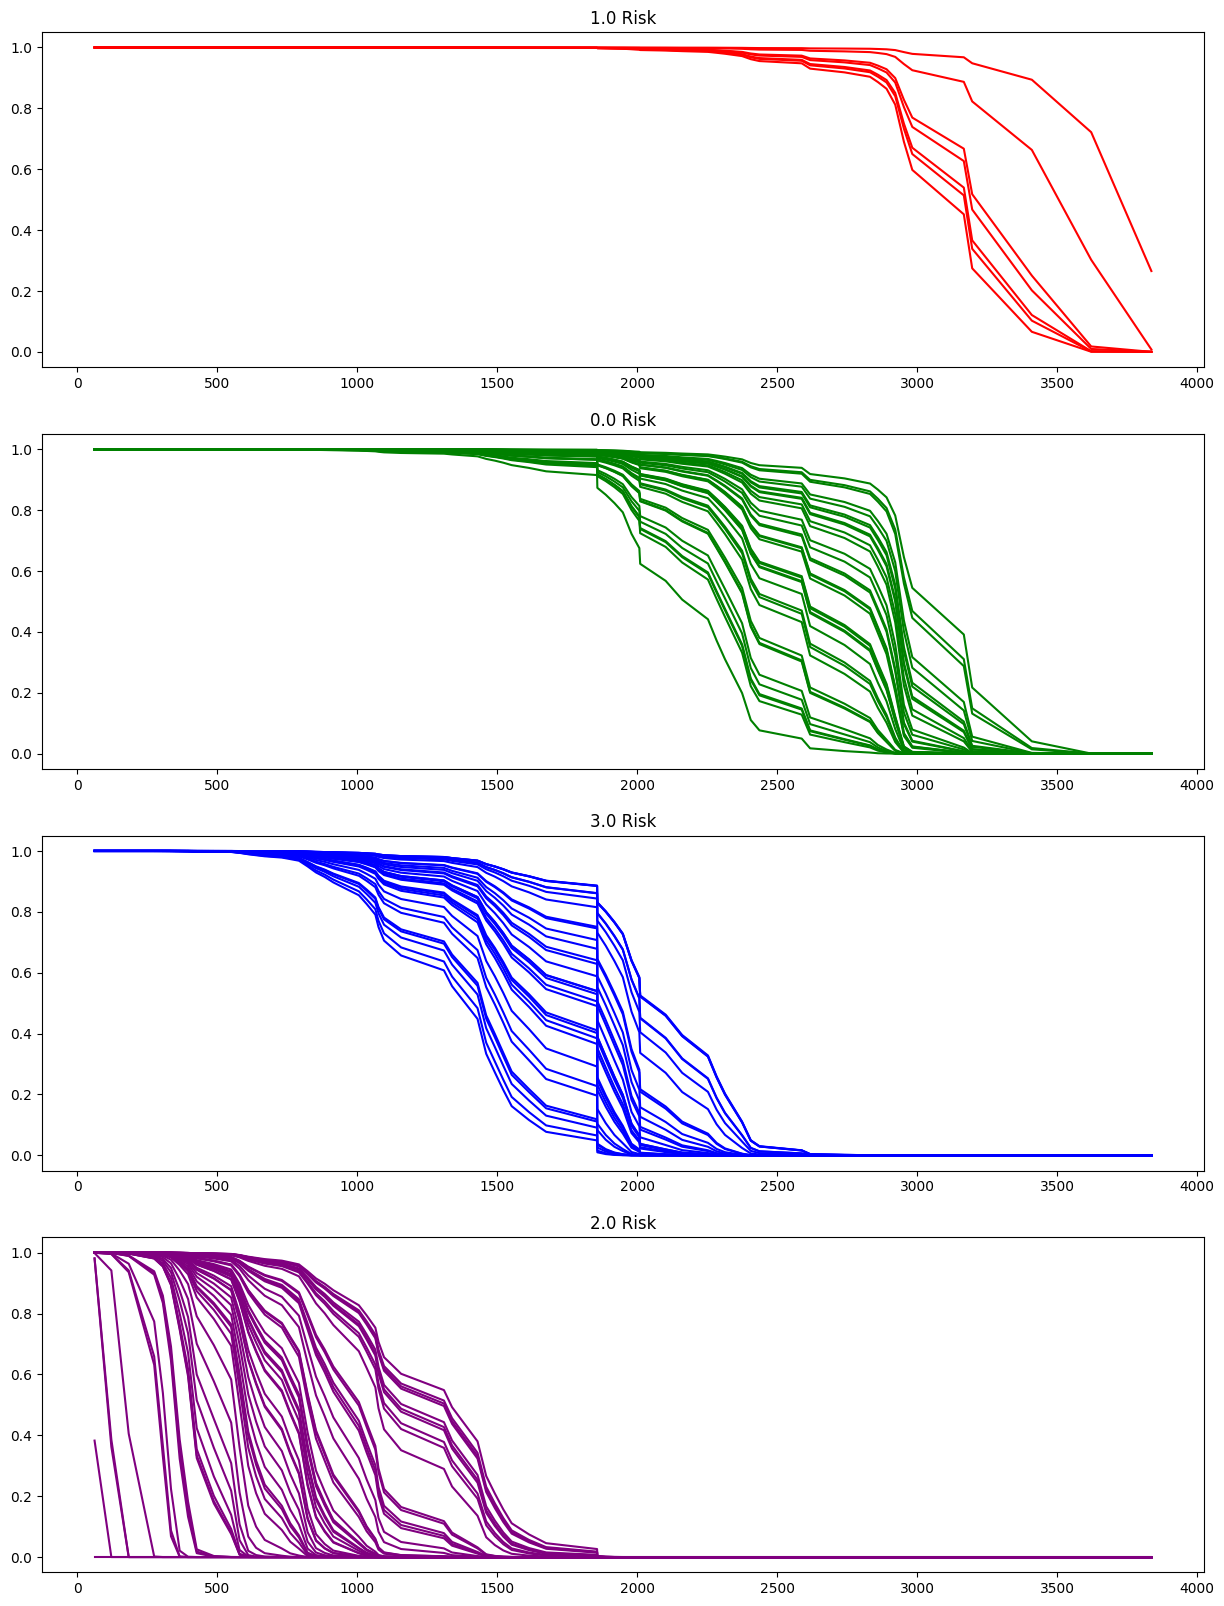

In [40]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

for i, (ax, (label, (color, idxs))) in enumerate(zip(axes.flat, risk_groups.items())):
    X = X_full.values[idxs, :]
    T = T_full[idxs]
    E = E_full[idxs]

    broken = np.argwhere((E == 1)).flatten()
    for j in broken:
        survival = cox_model.predict_survival(X[j, :]).flatten()
        ax.plot(cox_model.times, survival, color=color)

    ax.set_title(f"{label.title()} Risk")

plt.show()

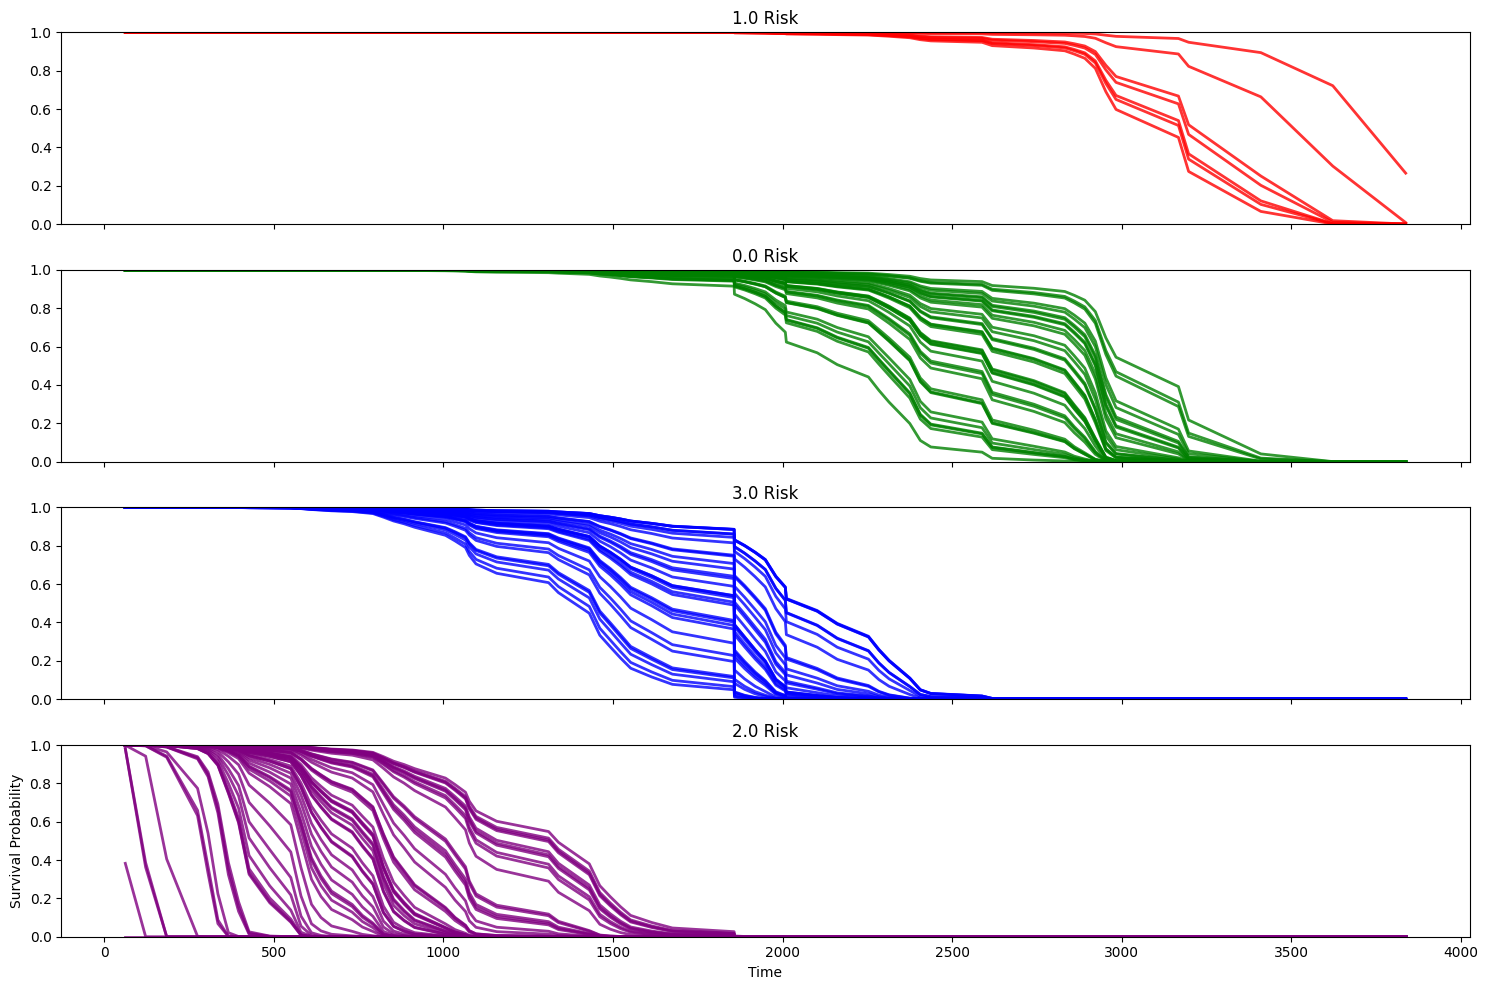

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True, sharey=True)  # Ensure consistent axes

for i, (ax, (label, (color, idxs))) in enumerate(zip(axes.flat, risk_groups.items())):
    X = X_full.values[idxs, :]
    T = T_full[idxs]
    E = E_full[idxs]

    if len(idxs) == 0:  # Ensure the group has data
        ax.set_title(f"{label.title()} Risk (No Data)")
        continue

    broken = np.argwhere((E == 1)).flatten()
    if len(broken) == 0:  # Ensure there are events to plot
        ax.set_title(f"{label.title()} Risk (No Events)")
        continue

    for j in broken:
        survival = cox_model.predict_survival(X[j, :]).flatten()
        ax.plot(cox_model.times, survival, color=color, linewidth=2, alpha=0.8)

    ax.set_title(f"{label.title()} Risk")
    ax.set_ylim(0, 1)  # Ensure all plots use the same y-axis scale for visibility

plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.tight_layout()
plt.show()
